In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
measurement_df=pd.read_csv('Resources/hawaii_measurements.csv')
measurement_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [4]:
station_df=pd.read_csv('Resources/hawaii_stations.csv')
station_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [125]:
merge_table=pd.merge(measurement_df,station_df,on="station")
merge_table.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.sql import label
from sqlalchemy import create_engine, func,inspect

In [77]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [78]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [79]:
column=inspector.get_columns('measurement')
for c in column:
    print (c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [80]:
column=inspector.get_columns('station')
for c in column:
    print (c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [81]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [82]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [83]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [84]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [85]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#find the most recent date in the db
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
most_recent_date








('2017-08-23')

In [86]:
start_date=dt.date(2018,7,23)
end_date=dt.date(2018,9,7)

In [127]:
#query to retrieve 365 days from last_date
#most_recent_date = session.query(func.max(Measurement.date)).scalar()
#year = dt.timedelta(days=365)
first_date =  dt.date(2017,8, 23) - dt.timedelta(days=365)


year_ago_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > first_date).\
                        order_by(Measurement.date).all()
year_ago_prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [88]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_prec_df = pd.DataFrame(year_ago_prcp,columns = ['Date','Precipitation'])
date_prec_df.set_index('Date',inplace=True)
date_prec_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [89]:
date_prec_new_df = date_prec_df.dropna()
date_prec_new_df.head() 

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


In [90]:
#Avg_prec = date_prec_new_df["Precipitation"].mean
#Avg_prec

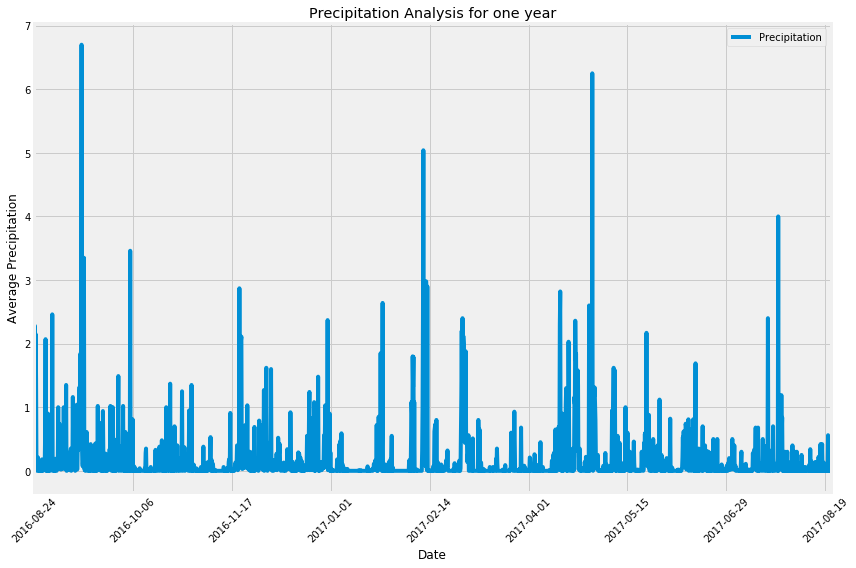

In [91]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prec_new_df.plot(figsize=(12, 8), x_compat=True)
plt.xlabel("Date")
plt.ylabel("Average Precipitation")
plt.title("Precipitation Analysis for one year")
#rotate the x labels 45 degrees
plt.xticks(rotation='45')
plt.legend(["Precipitation"])
#make it a tight layout
plt.tight_layout()
plt.savefig("Precipitation_Analysis.png")
plt.show()

![precipitation](Images/precipitation.png)

In [92]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prec_new_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [93]:
# Design a query to show how many stations are available in this dataset?
total_session = session.query(Station.station).count()
print(total_session)

9


In [94]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_station = session.query(Measurement.station,func.count(Measurement.tobs)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.tobs).desc())
# List the stations and the counts in descending orde
for station in active_station:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [95]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_calculation= session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
       filter(Measurement.station == 'USC00519281').\
       filter(Measurement.date > first_date).\
       order_by(Measurement.date).all()
for tmin,tavg,tmax in temp_calculation: 
    print("Lowest Temp:",tmin,"Avarage Temp:",tavg,"Max Temp:",tmax)

Lowest Temp: 59.0 Avarage Temp: 73.0968660968661 Max Temp: 83.0


In [96]:
# Choose the station with the highest number of temperature observations.
max_observations = session.query(Measurement.station, func.count(Measurement.tobs))\
             .group_by(Measurement.station)\
             .order_by(func.count(Measurement.tobs).desc()).first()
for station in max_observations:
    print(station)



USC00519281
2772


In [97]:
#Filter by the station with the highest number of observations.
higest_observ = session.query(Measurement.date,Measurement.tobs).\
                filter (Measurement.station == 'USC00519281').\
                filter (Measurement.date > first_date).\
                order_by(Measurement.date).all()

#making the Dataframe
higest_observ_df = pd.DataFrame(higest_observ,columns=['Date','Observation']) 
higest_observ_df.head()

,Date,Observation
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


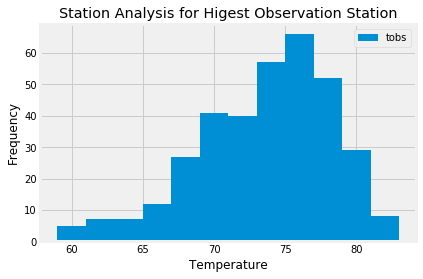

In [119]:
#Plot the results as a histogram with bins=12.
plt.hist(higest_observ_df['Observation'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("Station Analysis for Higest Observation Station")
plt.legend(['tobs'])
plt.savefig("Station Analysis for Higest Observation Station.png")
plt.show()

![precipitation](Images/station-histogram.png)

In [99]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    temps= session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    tmp_min, tmp_avg, tmp_max = temps[0]
    return[('Trip Min Temp', tmp_min), ('Trip Avg Temp', tmp_avg), ('Trip Max Temp', tmp_max)]   
#previous year start annd end date
start_date = '2016-08-23'
end_date = '2016-09-07'

temp_list=(calc_temps('2016-08-23','2016-09-07'))
print(temp_list)

[('Trip Min Temp', 71.0), ('Trip Avg Temp', 78.05), ('Trip Max Temp', 84.0)]


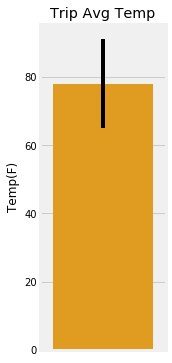

In [120]:
# Plot the results from your previous query as a bar chart. 
temp_df=pd.DataFrame(temp_list,columns =['Title','Temp(F)'])
temp_df.sort_values(by=['Temp(F)'])


# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = temp_df.iloc[2][1] - temp_df.iloc[0][1]
error

# Use the average temperature for the y value
plt.figure(figsize=(2,6))
sns.barplot(y='Temp(F)', data=temp_df.iloc[1:2], 
                  yerr=error,color='orange')

# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp")
plt.savefig("Trip Avg Temp")

In [124]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

prev_start=dt.date(2017,8, 23) - dt.timedelta(days=365)
prev_end=dt.date(2017,9,7)- dt.timedelta(days=365)

#Total amount of rain fall
total_rainfall=session.query(Station.name,Station.station,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation).\
                filter(Measurement.station == Station.station).\
                filter (Measurement.date >= prev_start).\
                filter(Measurement.date <= prev_end).\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp)).all()
                
              
total_rainfall_df=pd.DataFrame(total_rainfall,columns = ['Name','Station','Total Rainfall','Latitude','Longitute','Elevation'])

total_rainfall_df

,Name,Station,Total Rainfall,Latitude,Longitute,Elevation
0,"PEARL CITY, HI US",USC00517948,0.06,21.39340,-157.97510,11.9
1,"WAIKIKI 717.2, HI US",USC00519397,0.38,21.27160,-157.81680,3.0
2,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,2.82,21.33556,-157.71139,19.5
3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,3.01,21.52130,-157.83740,7.0
4,"KANEOHE 838.1, HI US",USC00513117,3.38,21.42340,-157.80150,14.6
5,"WAIHEE 837.5, HI US",USC00519281,5.91,21.45167,-157.84889,32.9
6,"MANOA LYON ARBO 785.2, HI US",USC00516128,11.75,21.33310,-157.80250,152.4


## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
# calculate the daily normals for your trip    
daily_normals("08-23")
#daily_result=list(np.ravel(daily))
#daily_result

[(67.0, 76.6923076923077, 87.0)]

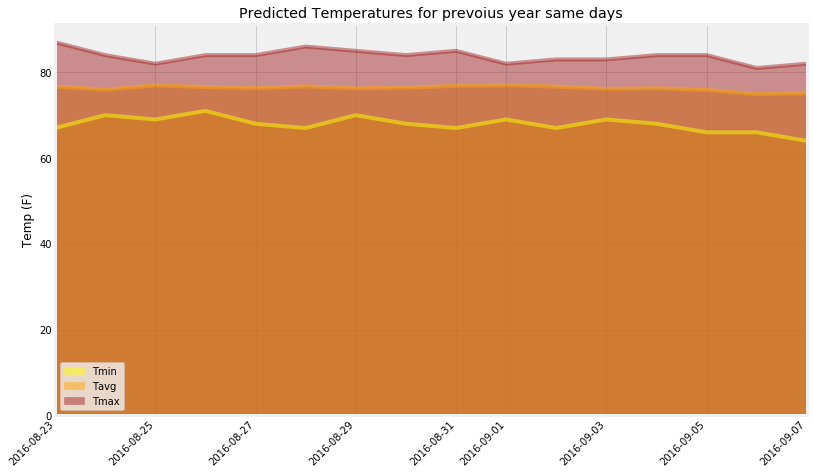

<Figure size 432x288 with 0 Axes>

In [121]:
'''Calculate the Daily Normals'''

#create a function called daily_normals that will calculate the daily normals for a specific date
def daily_normals(day_date):
    temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                          filter(func.strftime("%m-%d", Measurement.date) == day_date).all()
    return temps
trip_start=dt.date(2016,8,23)
trip_end =dt.date(2016,9,7)
    
# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end)

# Stip off the year and save a list of %m-%d strings
trip_mmdd = trip_dates.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for trip_date in trip_mmdd:
    #append daily_normals
    normals.append(*daily_normals(trip_date))

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'])

#make the trip dates the index
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')
#normals_df =pd.to_datetime(normals_df , errors = 'coerce')

# Plot the daily normals as an area plot with `stacked=False`

#make a colors list
colors = ['yellow','orange', 'brown']

#make an area plot for the predicted temps
normals_df.plot(kind='area', figsize=(12,8), stacked=False, x_compat=True, color=colors, title='Predicted Temperatures for prevoius year same days', rot=45)

#make the labels
plt.xlabel('')
plt.ylabel('Temp (F)')

plt.show()
plt.savefig('Predicted Temperatures for prevoius year same days')